In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import backend as K

Using TensorFlow backend.


In [2]:
seed = 27

raw_data = pd.read_csv("./input/train.csv")

train, validate = train_test_split(raw_data, test_size=0.1, random_state = seed, stratify = raw_data['label'])

In [3]:
# Split into input (X) and output (Y) variables
x_train = train.values[:,1:]
y_train = train.values[:,0]

x_validate = validate.values[:,1:]
y_validate = validate.values[:,0]

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10
batch_size = 512

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_validate = x_validate.reshape(x_validate.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_validate = x_validate.reshape(x_validate.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
x_train /= 255
x_validate /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_validate.shape[0], 'validation samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validate = keras.utils.to_categorical(y_validate, num_classes)

x_train shape: (37800, 28, 28, 1)
37800 train samples
4200 validation samples


In [5]:
x_train.shape

(37800, 28, 28, 1)

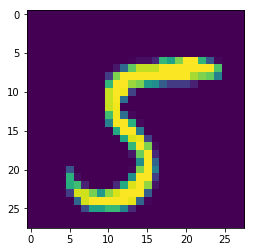

In [6]:
plt.imshow(x_train[2][:,:,0])

In [1]:
from keras.models import load_model
from keras.utils import plot_model
keras_model = load_model('models/cnnmodel2.hdf5')

Using TensorFlow backend.


In [3]:
from keras.utils import plot_model
plot_model(keras_model, to_file='model2v1.png', rankdir='LR')

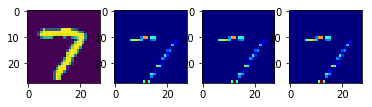

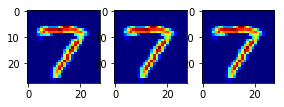

In [56]:
from vis.visualization import visualize_cam

plt.subplot(141)
for layer in [3,5]:
    plt.imshow(x_validate[0].reshape((28,28)))
    for j,modifier in enumerate([None, 'guided', 'relu']):
        heat_map = visualize_cam(keras_model, layer, None, x_validate[0])
        plt.subplot(1,4,j+2)
        plt.imshow(heat_map)

    plt.show()

In [8]:
keras_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

In [9]:
from keras.models import Model
#for cnnmodel
# layer_outputs = [layer.output for layer in keras_model.layers]
# activation_model = Model(inputs=keras_model.input, outputs=layer_outputs)

#for cnnmodel2
layer_outputs = [layer.output for layer in keras_model.layers] 
layer_outputs = layer_outputs[1:] 
activation_model = Model(inputs=keras_model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[2].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    print(activation.shape)
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

(1, 28, 28, 64)


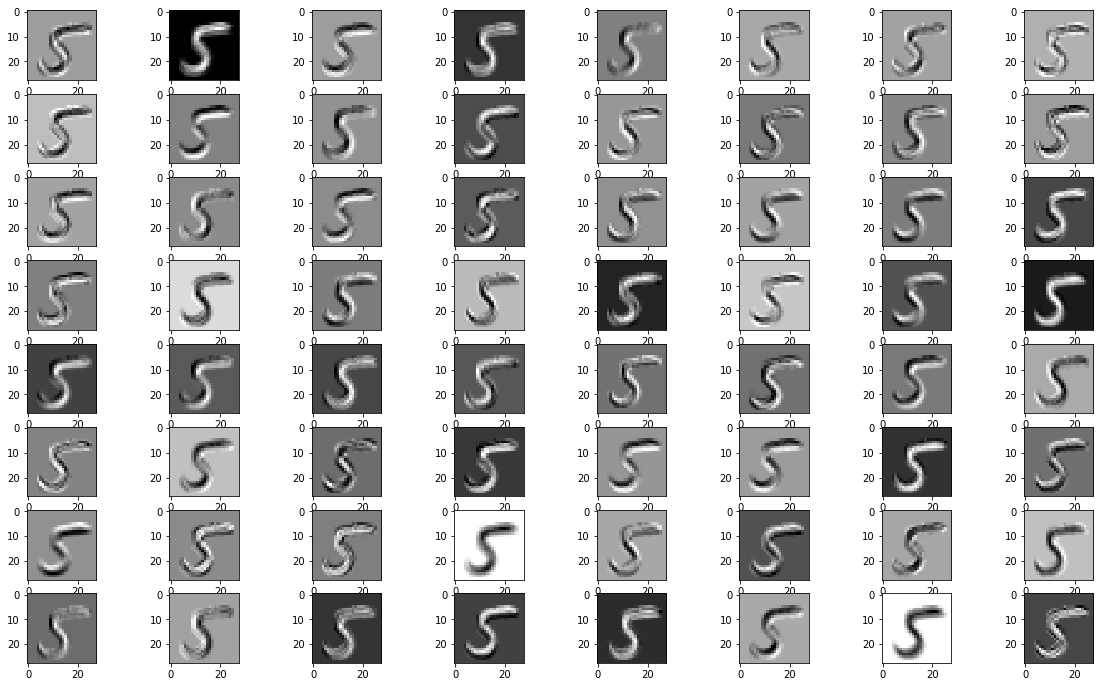

In [10]:
display_activation(activations, 8,8,1)

(1, 28, 28, 64)


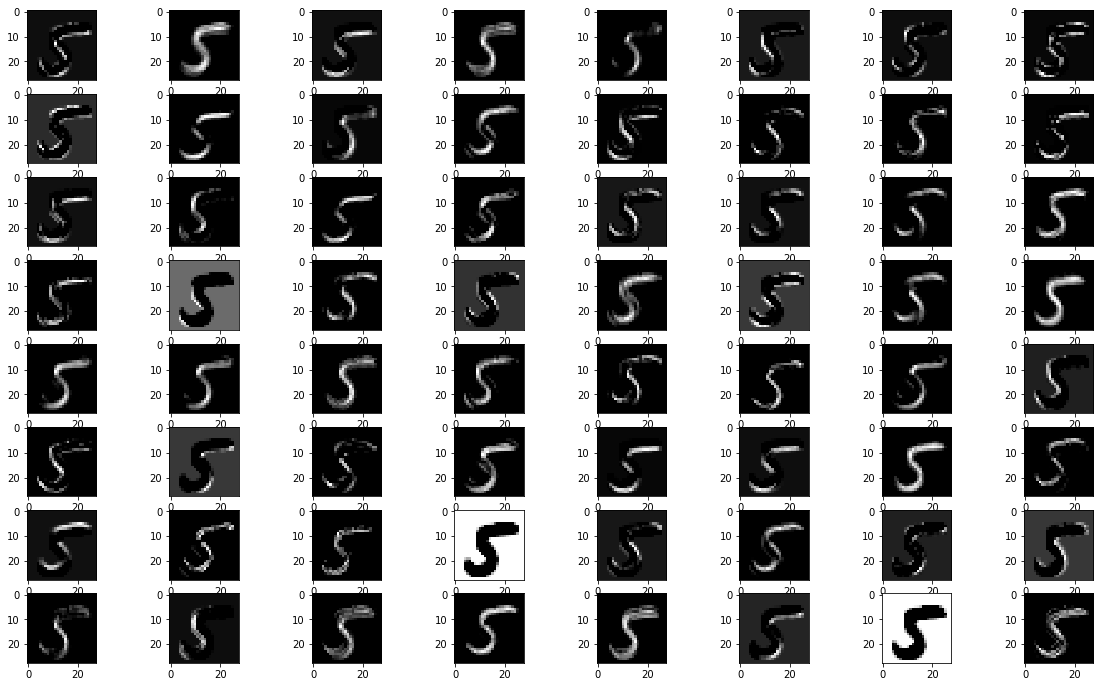

In [11]:
display_activation(activations, 8,8,2)

(1, 14, 14, 64)


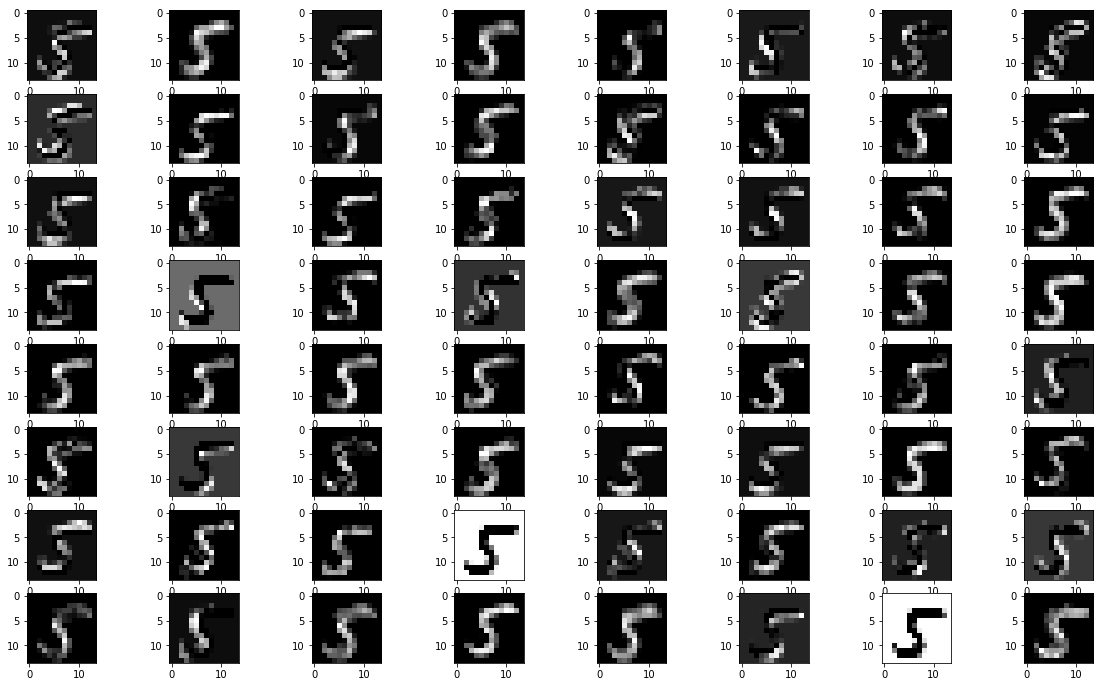

In [12]:
display_activation(activations,8,8,3)

(1, 14, 14, 64)


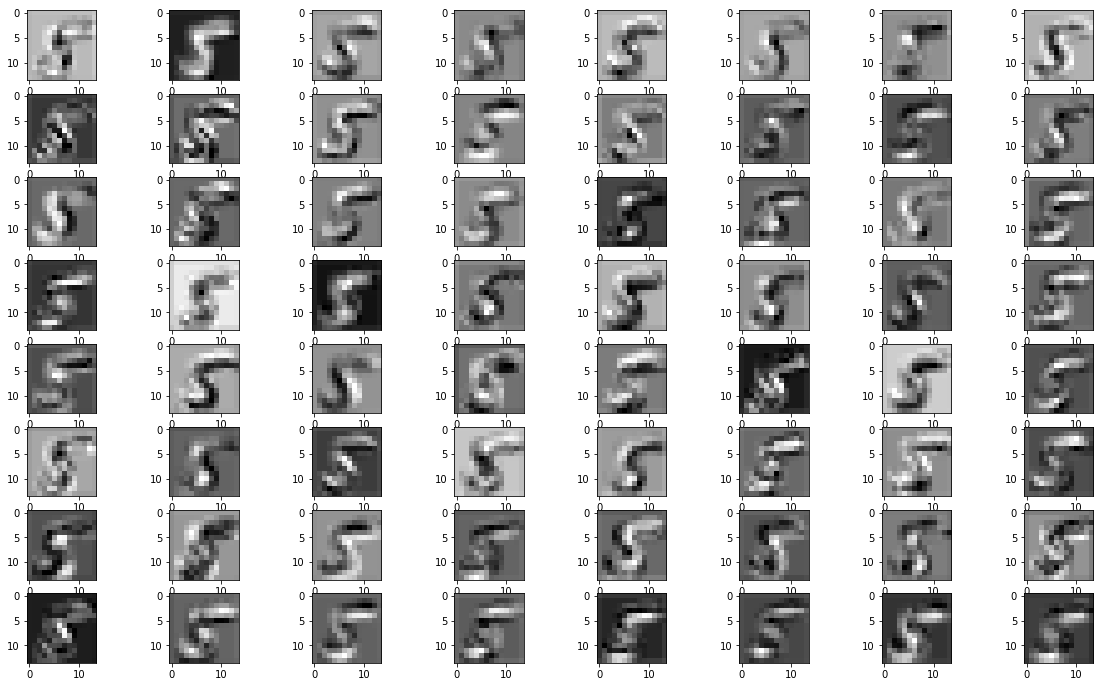

In [13]:
display_activation(activations,8,8,4)

(1, 14, 14, 64)


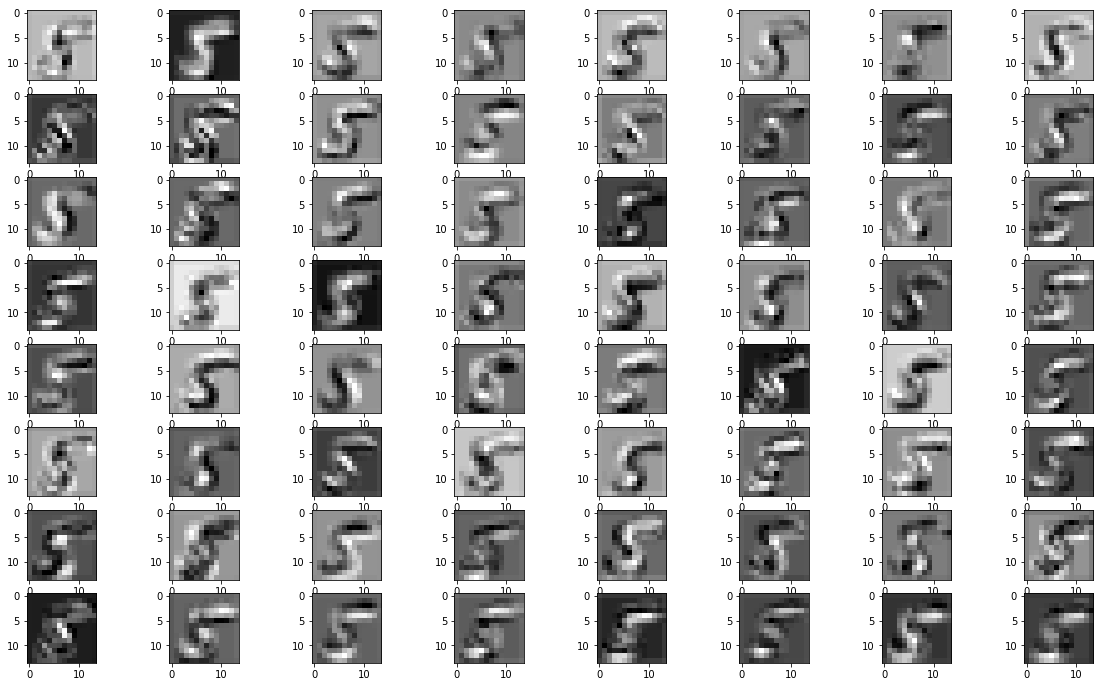

In [14]:
display_activation(activations,8,8,5)

(1, 14, 14, 64)


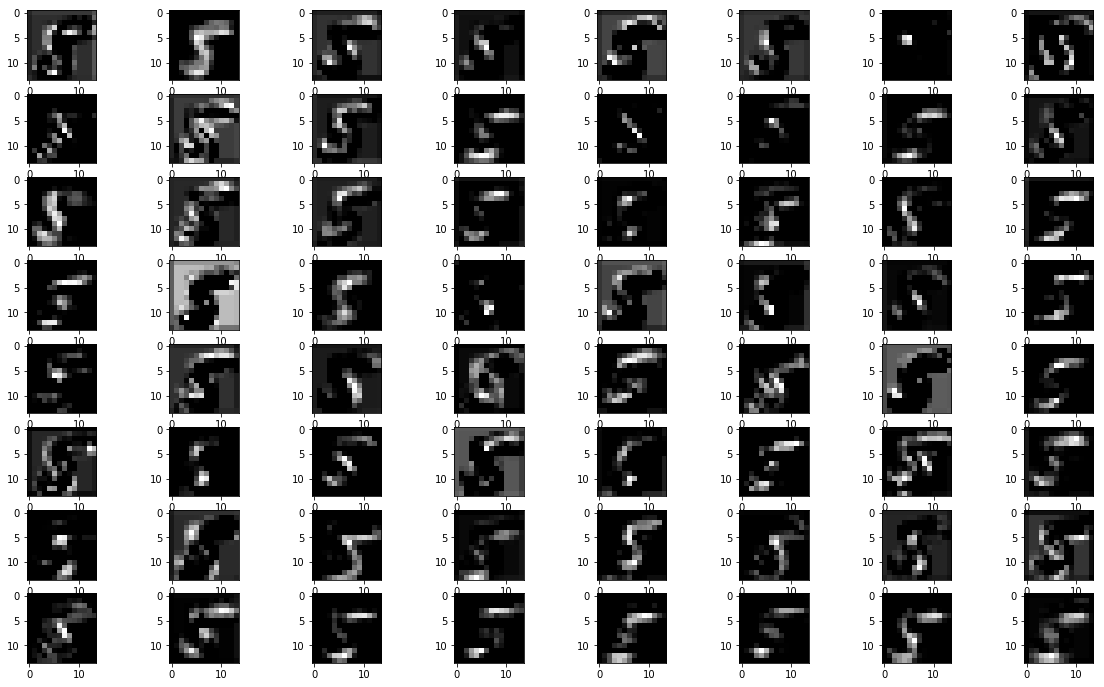

In [15]:
display_activation(activations,8,8,6)

(1, 7, 7, 64)


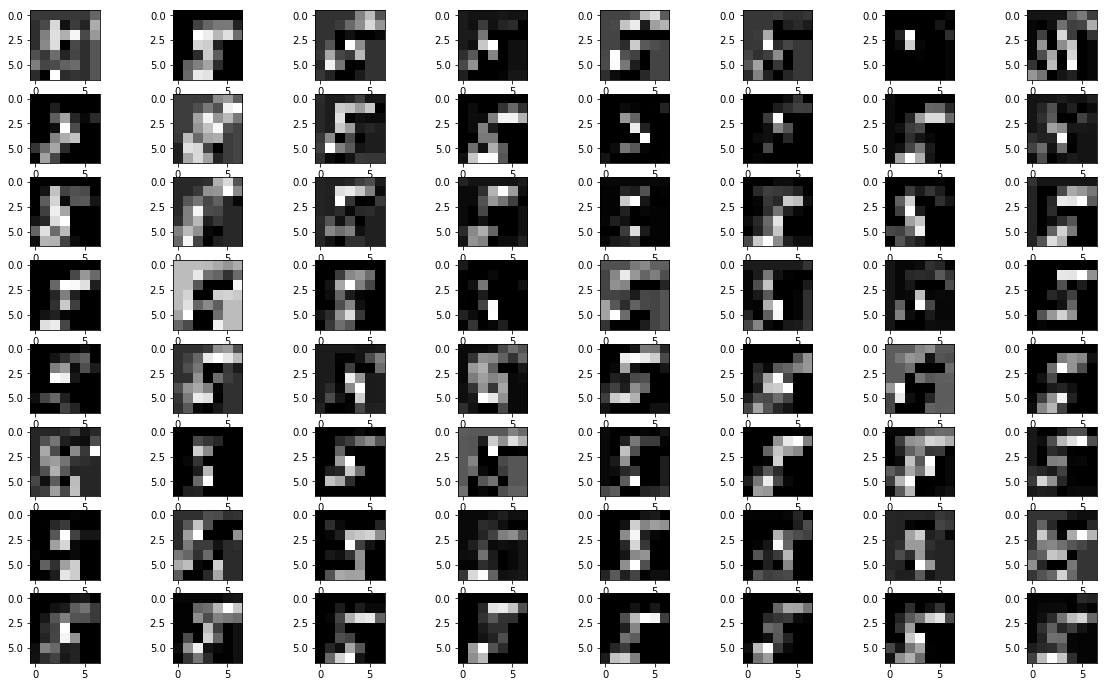

In [16]:
display_activation(activations,8,8,7)

(1, 7, 7, 32)


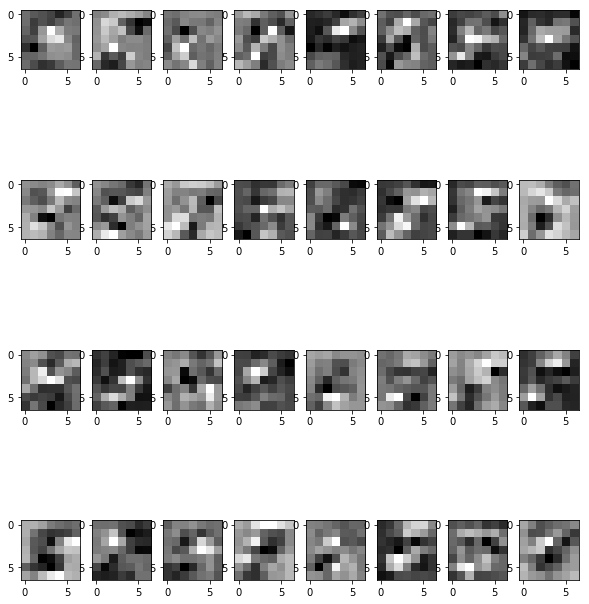

In [17]:
display_activation(activations,8,4,8)

(1, 7, 7, 32)


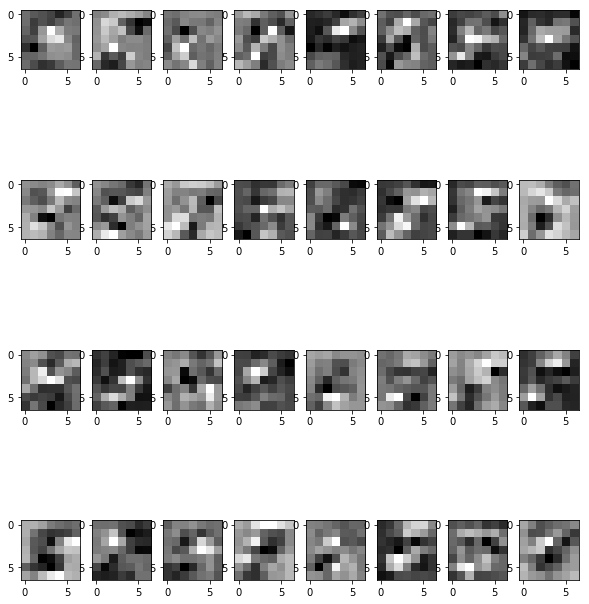

In [18]:
display_activation(activations,8,4,9)

(1, 7, 7, 32)


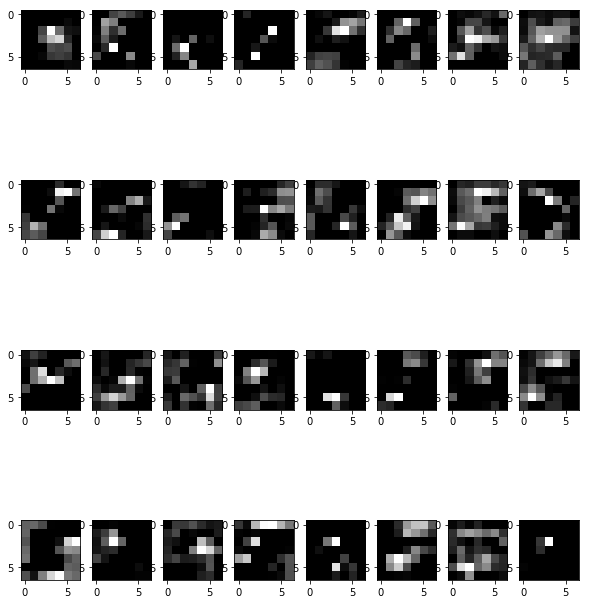

In [19]:
display_activation(activations,8,4,10)

(1, 3, 3, 32)


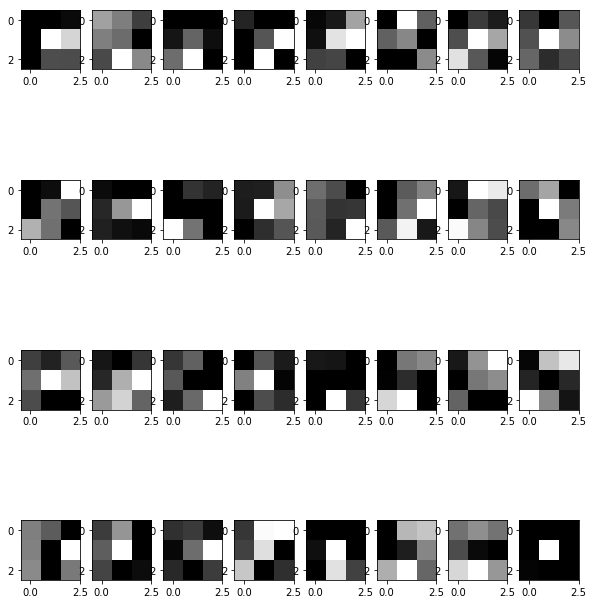

In [20]:
display_activation(activations,8,4,11)